In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Performing EDA

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Performing EDA and Data Cleanin together

In [8]:
# checking for duplicates
df.duplicated().sum()

0

In [9]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease'>

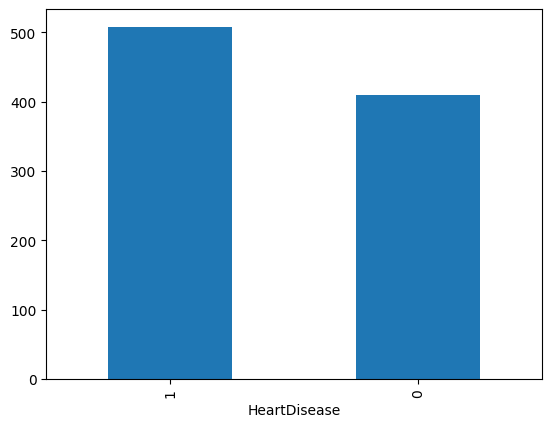

In [10]:
# plotting
df['HeartDisease'].value_counts().plot(kind='bar')

In [11]:
# checking for null
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

creating distribution of numeric tables and checking if they are correct or not

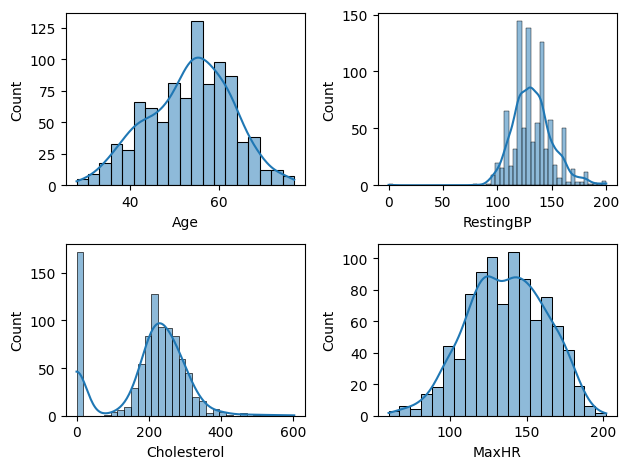

In [12]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout() # to remove overlappting of y-axis


Now here comes the part, in plot 2 and 3 there are people having resting bp and cholesterols as 0  which is not possible.

So when these data sets are created, to avoid the null values and make the data perfect, the creators often replace the null values by 0.

So even though there aren't any null values directly, but they are hidden in the form of some 0s

now we will perform cleaning

In [13]:
# for cholesterol, replacing missing values through mean of rest values

# finding out mean of rest of the people having non zero cholesterol
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()

In [14]:
# replacing 0 with mean
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2) # since the value is large so rounding off to 2 decimal places

In [15]:
# doing same for restingBP
resting_mean = df.loc[df['RestingBP'] != 0,'RestingBP'].mean()

df['RestingBP'] = df['RestingBP'].replace(0,resting_mean)
df['RestingBP'] = df['RestingBP'].round(2)

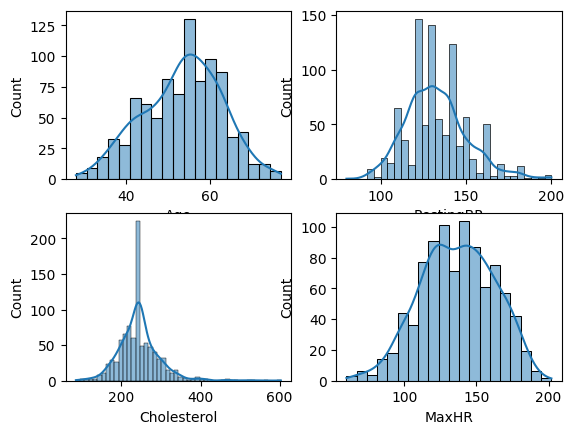

In [16]:
# plotting once again
def plotting2(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plotting2('Age',1)
plotting2('RestingBP',2)
plotting2('Cholesterol',3)
plotting2('MaxHR',4)


handling categorical data

In [17]:
import sheryanalysis as sh # developed by sheryians to handle categorical data

In [18]:
sh.analyze(df) # won't be using this right now as it's under development


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

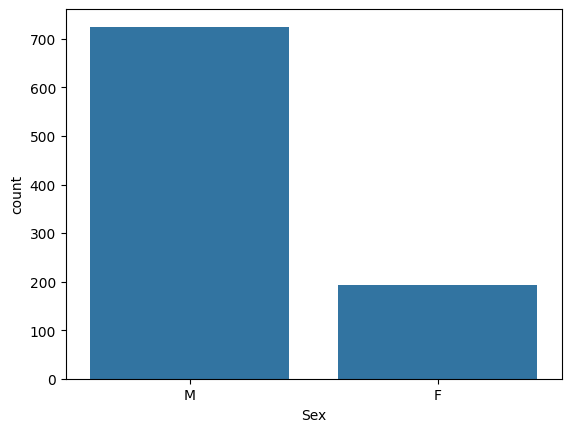

In [19]:
# Handling categorical columns

# Plotting gender
sns.countplot(x = df['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

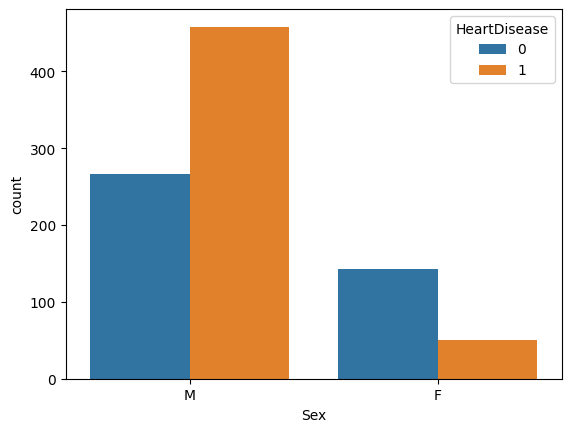

In [20]:
# heart disease male vs female
sns.countplot(x = df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

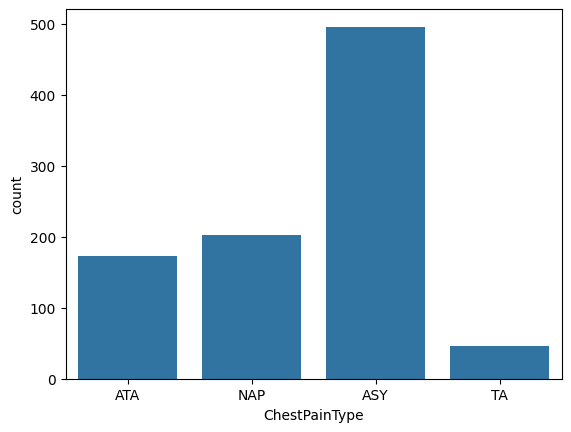

In [21]:
# plotting Chest Pain Type
sns.countplot(x = df['ChestPainType'])

<Axes: xlabel='HeartDisease', ylabel='count'>

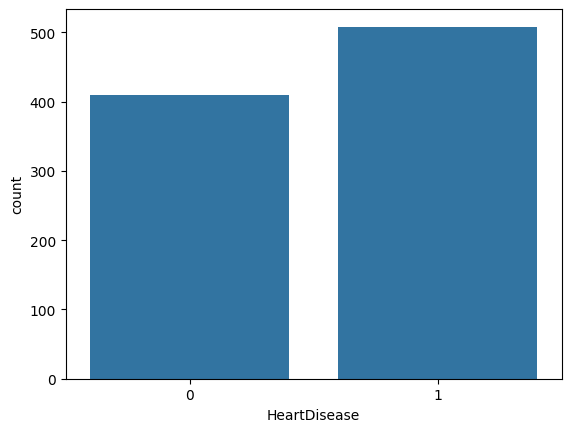

In [22]:
# plotting Heart Disease
sns.countplot(x = df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

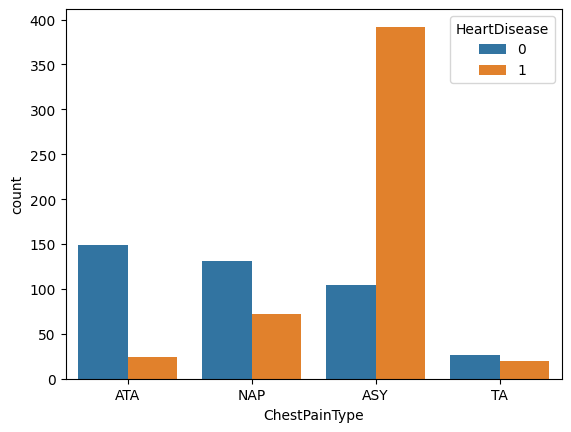

In [23]:
# now using hue to combine both
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

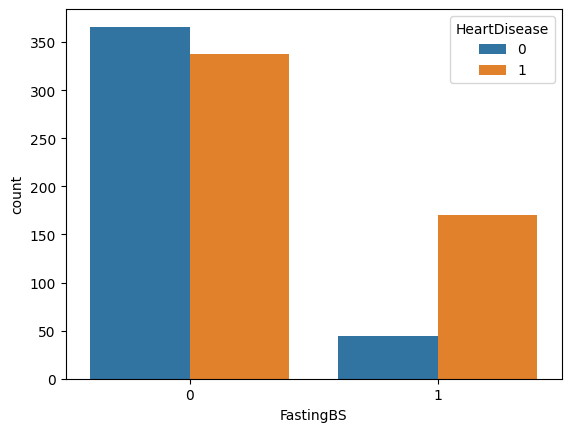

In [24]:
# fasting bp and heart diesease
sns.countplot(x = df['FastingBS'],hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

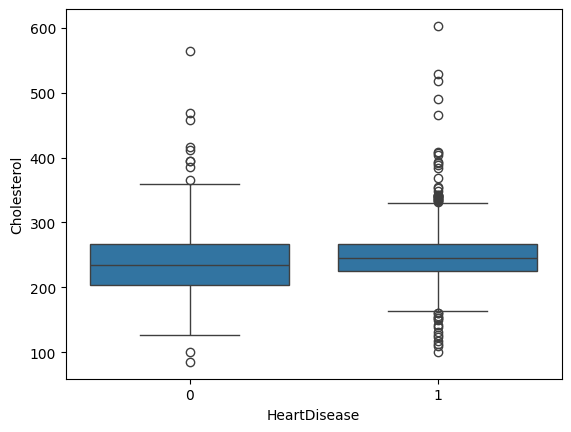

In [25]:
# now using a boxplot as it can compare numeric and categorical variables
sns.boxplot(x = 'HeartDisease',y = 'Cholesterol',data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

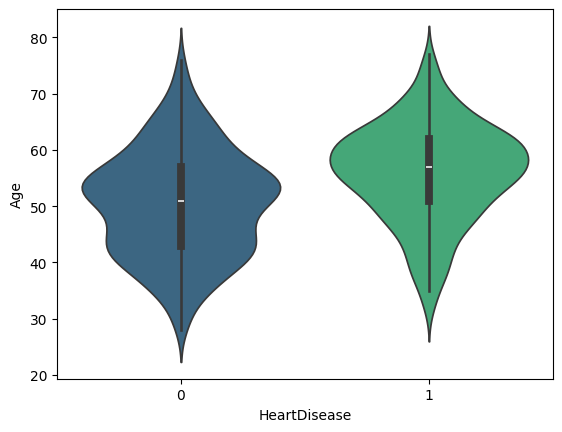

In [26]:
# violin plot
sns.violinplot(x='HeartDisease',y='Age',data=df,palette='viridis')

<Axes: >

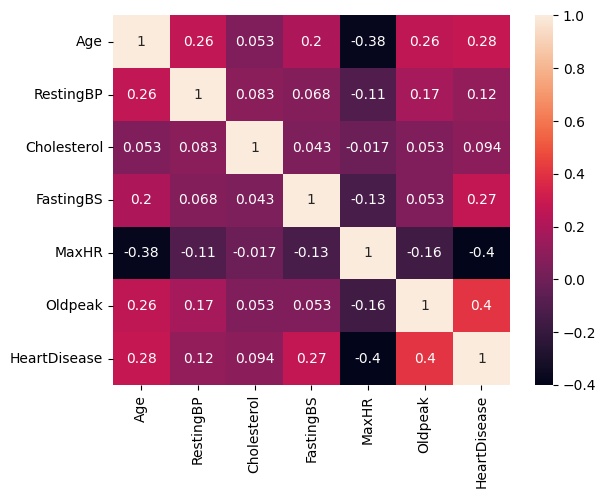

In [27]:
# heatmap to find correlation
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Preprocessing and Cleaning

In [47]:
# data cleaning is done and now we will perform preprocessing of data

# creating dummies or splitting of columns into multiple ones
df_encoded = pd.get_dummies(df,drop_first=True) # making dummies and on the basis of main column making values into True and False

In [48]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [49]:
# converting to 0 and 1
df_encoded = df_encode.astype(int)

In [50]:
df_encoded.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1
1,0,1,-1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1,0,0,0,-1,0,0,1,1,0,0,0,1,0,0,1
3,0,0,0,0,-1,0,1,0,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
5,-1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
6,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
7,0,-1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
8,-1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0
9,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


now we will create a full on working applicaion

In [51]:
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

Now we will perform all the classification using all the concepts we learned in Lecture-3

In [52]:
# importing useful modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [53]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

Performing Feature Scaling

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True)
}

In [57]:
# saving all the outputs of the models in this list

results = []

In [58]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })

In [59]:
results

[{'Model': 'Logistic Regression', 'Accuracy': 0.8913, 'F1 Score': 0.9038},
 {'Model': 'KNN', 'Accuracy': 0.8804, 'F1 Score': 0.8932},
 {'Model': 'Naive Bayes', 'Accuracy': 0.8696, 'F1 Score': 0.8776},
 {'Model': 'Decision Tree', 'Accuracy': 0.7663, 'F1 Score': 0.7795},
 {'Model': 'SVM (RBF Kernel)', 'Accuracy': 0.8804, 'F1 Score': 0.8952}]

now we want to save and use this model to use it to front end
so we convert it to pickle format

The pickle module in Python provides a way to serialize and deserialize Python object structures.

In [60]:
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')

joblib.dump(scaler,'scaler.pkl')

joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']